This notebook is adapted from https://colab.research.google.com/github/mlittmancs/great_courses_ml/blob/master/L11.ipynb courtesy of [Mohannad Elhamod](https://wordpress.cs.vt.edu/elhamod/).

In this notebook, we will use k-means modeling to cluster handwritten numbers from the MNIST dataset

We will download the MNIST dataset and split the data into training data, `X_train` and `y_train` and test data, `X_test` and `y_test`.

In [21]:
from sklearn.datasets import fetch_openml
# !pip install joblib
from joblib import Memory

# fetch and cache the dataset
mem = Memory('./tmp')
fetch_openml_cached = mem.cache(fetch_openml)
data = fetch_openml_cached(name='mnist_784')

# get a subset
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.33)

# get a subset of digits
# digits = ['0','1']
digits = ['7','9']
# digits = ['0','1','2']
# digits = ['0','1','2','3','4', '5', '6', '7', '8', '9']

indexer = y_train.isin(digits)
y_train = y_train[indexer]
X_train = X_train[indexer]
indexer = y_test.isin(digits)
y_test = y_test[indexer]
X_test = X_test[indexer]

Here, we run `kmeans` on our `X_train` data. We then find the accuracy of these new centers on the test set.

In [22]:
from scipy import stats
import math
from functools import reduce
import random
from sklearn.cluster import KMeans
import numpy as np

# Find clusters
k = len(digits)
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)

We'll next print the images that best represent the centers of each of our clusters in K-means and the label for each of the clusters

In [23]:
from PIL import Image
from matplotlib import pyplot as plt

for i in range(kmeans.cluster_centers_.shape[0]):
  display(Image.fromarray(np.reshape(kmeans.cluster_centers_[i],(28,28))).convert("L"))
  clust_labs = y_train[kmeans.labels_ == i].mode().iloc[0]
  print('cluster', i, 'with label', clust_labs, '\n')


cluster 0 with label 9 



cluster 1 with label 7 



Let's plot the average distance from centroids for different k's 

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
  5%|▌         | 1/19 [00:00<00:05,  3.40it/s]/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
 11%|█         | 2/19 [00:00<00:07,  2.17it/s]/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
 16%|█▌        | 3/19 [00:01<00:09,  1.75it/s]/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
 21%|██        | 4/19 [00:02<00:10,  1.3

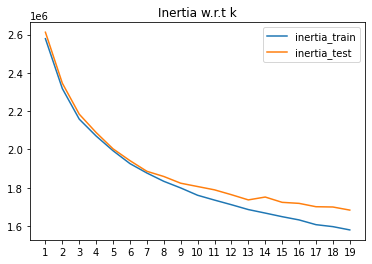

In [24]:
import matplotlib.pyplot as plt
from tqdm import tqdm 

inertia_train = []
inertia_test = []
ks = 20

for k_ in tqdm(np.arange(1, ks)):
  kmeans = (KMeans(n_clusters=k_, random_state=0).fit(X_train))
  inertia_train.append(kmeans.inertia_/X_train.to_numpy().shape[0])

  diff = kmeans.cluster_centers_[kmeans.predict(X_test.to_numpy())] - X_test.to_numpy()
  diff_squared = diff**2
  sum_diff_squared = np.sum(diff_squared, axis=1)
  avg_sum_diff_squared = np.sum(sum_diff_squared)/sum_diff_squared.shape[0]
  inertia_test.append(avg_sum_diff_squared)

  # print(inertia_train, inertia_test)

plt.plot(np.arange(1, ks), inertia_train, label = 'inertia_train')
plt.plot(np.arange(1, ks), inertia_test, label = 'inertia_test')
plt.legend()
# plt.yscale("log")
plt.xticks(np.arange(1, ks))
plt.title('Inertia w.r.t k')
plt.show()

Let's plot 10 test images and see which cluster centroid they belong to.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/pytho

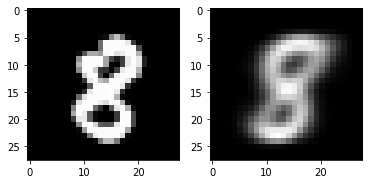

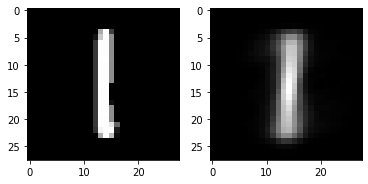

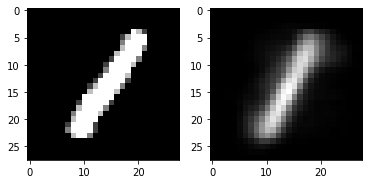

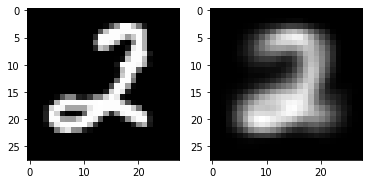

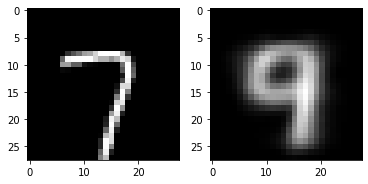

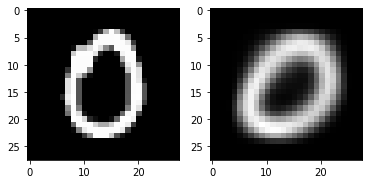

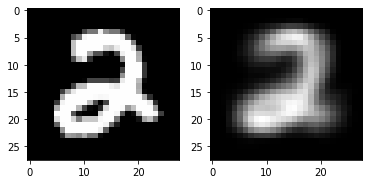

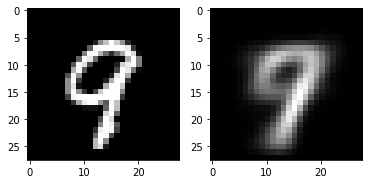

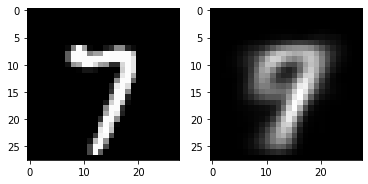

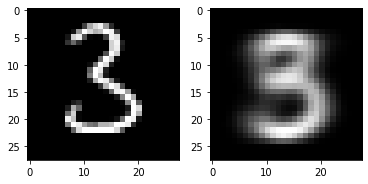

In [14]:
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)

for i in range(10):
  example = X_test.iloc[i]
  example_numpy = example.to_numpy()
  # print(kmeans.predict([example]))
  test_img = Image.fromarray(np.reshape(example_numpy,(28,28))).convert("L")
  centroid = Image.fromarray(np.reshape(kmeans.cluster_centers_[kmeans.predict([example])],(28,28))).convert("L")

  fig, ax = plt.subplots(1,2)
  ax[0].imshow(test_img,cmap = plt.cm.gray);
  ax[1].imshow(centroid,cmap = plt.cm.gray);

Let's plot PCA components

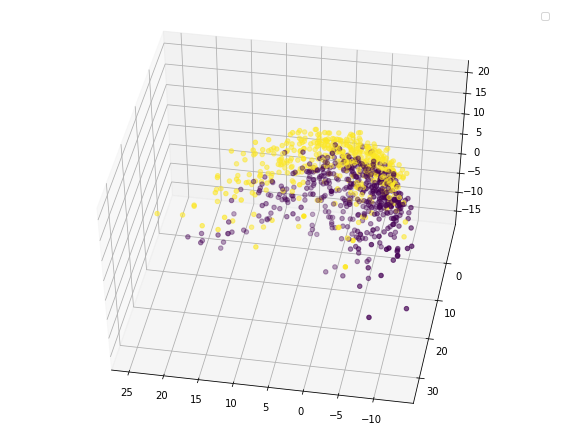

In [25]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=100)

X_ = X_train
y_ = y_train

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_)
X_ = scaler.transform(X_)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_)
X = pca.transform(X_)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= [int(i) for i in y_.to_numpy()])

ax.legend()
plt.show()